In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
dataset_train = pd.read_csv("/content/GOOG.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-26,62.549999,63.488548,62.451000,63.416500,63.344418,48112000
1,2018-07-27,63.549999,63.694500,61.549999,61.924999,61.854610,42612000
2,2018-07-30,61.400501,61.745800,60.573502,60.987000,60.917679,36998000
3,2018-07-31,61.000500,61.379398,60.279999,60.862999,60.793819,32894000
4,2018-08-01,61.400002,61.673500,60.510502,61.000500,60.931164,31344000


In [6]:
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)
print(training_set.shape)

[[ 62.549999]
 [ 63.549999]
 [ 61.400501]
 ...
 [120.870003]
 [121.926003]
 [121.879997]]
(1257, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.13429486],
       [0.14398775],
       [0.12315292],
       ...,
       [0.69958375],
       [0.70981944],
       [0.70937351]])

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_train = []
y_train = []
for i in range (60,1257):
  X_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)




In [10]:
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1197, 60, 1)

In [ ]:
pip install keras==2.12.0

ERROR: Operation cancelled by user


In [ ]:
!pip install tensorflow==2.12.0

ERROR: Operation cancelled by user


In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [13]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 76ms/step - loss: 0.0338
Epoch 2/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0059
Epoch 7/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0042
Epoch 13/100
38/38 [=====

In [15]:
dataset_test = pd.read_csv("/content/GOOG (1).csv")
actual_stock_price = dataset_test.iloc[:, 1:2].values

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 251):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
predicted_stock_price_original_scale = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price_original_scale


6/6 [==============================] - 0s 32ms/step


array([[121.71962 ],
       [124.21269 ],
       [127.784164],
       [130.06798 ],
       [131.46304 ],
       [131.49245 ],
       [130.6841  ],
       [129.47751 ],
       [128.91843 ],
       [128.90118 ],
       [129.52022 ],
       [130.55476 ],
       [131.31189 ],
       [130.82817 ],
       [130.13039 ],
       [130.20326 ],
       [129.99135 ],
       [129.96089 ],
       [129.67029 ],
       [128.98033 ],
       [128.71191 ],
       [129.29652 ],
       [131.23067 ],
       [131.70007 ],
       [131.74843 ],
       [132.02586 ],
       [133.1496  ],
       [134.73085 ],
       [136.31598 ],
       [136.69446 ],
       [136.60468 ],
       [135.74501 ],
       [135.27771 ],
       [135.70383 ],
       [136.28938 ],
       [136.28069 ],
       [136.75714 ],
       [137.47542 ],
       [137.63855 ],
       [137.67293 ],
       [137.87828 ],
       [136.1651  ],
       [133.97711 ],
       [132.2075  ],
       [131.30762 ],
       [130.64731 ],
       [130.56845 ],
       [131.7

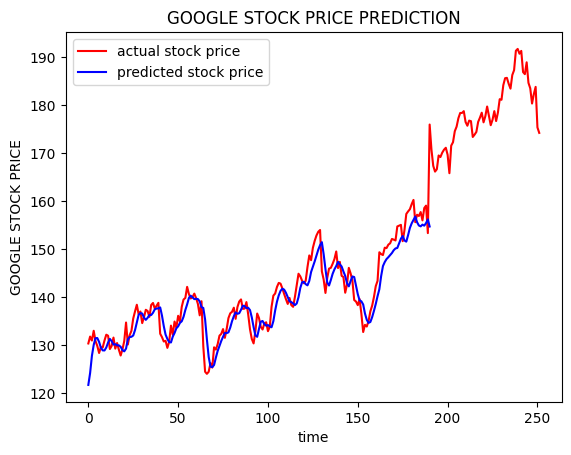

In [34]:
plt.plot(actual_stock_price, color = 'red' , label = 'actual stock price')
plt.plot(predicted_stock_price_original_scale, color = 'blue', label = 'predicted stock price')
plt.title('GOOGLE STOCK PRICE PREDICTION')
plt.xlabel('time')
plt.ylabel('GOOGLE STOCK PRICE')
plt.legend()
plt.show()
